<a href="https://colab.research.google.com/github/guitar79/OA-2018/blob/master/08_6_merge_RGB_image_using_mono_16bit_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Merge RGB file**


* 이 자료는 천체사진을 위한 16 bit mono Fits file을 merge 하는 방법에 대한 설명이다.

* python이 처음이라면 [Python Basic](https://colab.research.google.com/drive/1PCOoDIKypPVX9KTItMOht1cl96cPmeR_?authuser=1#scrollTo=3g6o04iLM0AF), [Python packages](https://colab.research.google.com/drive/1-1wx2VPEyNe11bmgpSpwdQgrJASCAqdH?authuser=1)를 먼저 학습하기를 권한다.

* package를 쉽게 설치하기 위해 Anaconda 사용을 권장한다.

경기과학고등학교 관측천문학 강좌를 위해 만들었으며  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">크리에이티브 커먼즈 저작자표시-비영리-동일조건변경허락 4.0 국제 라이선스</a>에 따라 이용할 수 있음.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="크리에이티브 커먼즈 라이선스" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>

#Download data

같은 대상을 여러장 촬영한 후 alignment하여 combine된 RGB channel image를 하나의 RGB image로 merge 해 보자. 
[example fits files](https://drive.google.com/open?id=1fMPbzoPi4JBbl9iUZHTl9dF5T5IGPf5L)  파일을 다운받는다.

다운받은 사진은 적당한 폴더에 압축을 푼다. 

#24 bit RGB

RGB 각 채널 8bit 로 변환하여 24 bit RGB image를 만들어 보자. 

RGB 각각의 channel image file을 읽는다.

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# read each channel file
red = Image.open('mean_image_R.png')
green = Image.open('mean_image_G.png')
blue= Image.open('mean_image_B.png')
print('red :', red)
print('green :', green)
print('blue :', blue)

red : <PIL.PngImagePlugin.PngImageFile image mode=I size=3352x2532 at 0x7F8C58582A58>
green : <PIL.PngImagePlugin.PngImageFile image mode=I size=3352x2532 at 0x7F8C582ACF60>
blue : <PIL.PngImagePlugin.PngImageFile image mode=I size=3352x2532 at 0x7F8C582BDE10>


image mode가 I 로 되어 있어 이를 변환할 필요가 있다. image mode는 아래 링크를 참조하라.

https://pillow.readthedocs.io/en/5.2.x/handbook/concepts.html#concept-modes


16bit를 8bit로 변환하기 위하여 256으로 나눈 list를 만들어 각 이미지의 pixel value를 8bit로 변환한다.



In [2]:
# making list for converting 16bit to 8bit
table = [ i/256 for i in range(65536)]

# convert 16 bit image to 8 bit 
red = red.point(table, 'L')
green = green.point(table, 'L')
blue = blue.point(table, 'L')
print('red :', red)
print('green :', green)
print('blue :', blue)

red : <PIL.Image.Image image mode=L size=3352x2532 at 0x7F8C58582A90>
green : <PIL.Image.Image image mode=L size=3352x2532 at 0x7F8C582BDB38>
blue : <PIL.Image.Image image mode=L size=3352x2532 at 0x7F8C582BDE48>


픽셀 값들의 평균을 구하여 파일을 png로 저장하고, 화면에 display 해 보자.

In [3]:
# composite 24bit image using 8bit
RGB_image = Image.merge("RGB", (red, green, blue))
print('RGB_image :', RGB_image)

RGB_image : <PIL.Image.Image image mode=RGB size=3352x2532 at 0x7F8C5856BE48>


픽셀 값들의 중간값을 구하여 파일을 png로 저장하고, 화면에 display 해 보자.

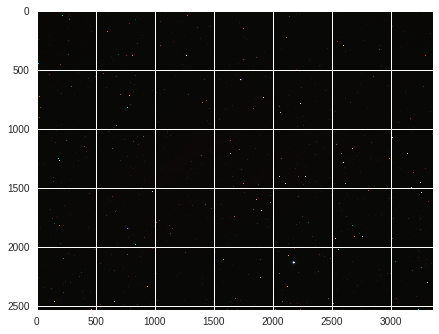

In [4]:
# display images
plt.imshow(RGB_image, interpolation = 'None')
plt.show()

# save images
RGB_image.save('RGB_24bit.png','png')

픽셀 값들의 sigma clip을 구하여 파일을 png로 저장하고, 화면에 display 해 보자.

정리 차원에서 최종 코드를 첨부한다.

* [full code](https://github.com/guitar79/OA-2018/blob/master/08-6.24_bit_RGB_composite_from_mono_16bit.py)

# 48bit RGB

RGB channel 별 16bit 데이터를 남기고 싶다면 fits format을 이용하는 것이 좋다.

다음과 같이 RGB 각 channel 별 16bit의 fits 파일을 불러올 수 있다.

16bit 정수형 자료를 실수 형태로 저장하자.

In [5]:
!pip install astropy
#위 코드는 이곳 notebook에서만 필요합니다. 다른곳에서는 주석 처리하시기 바랍니다.

import numpy as np
import cv2
from astropy.io import fits
import matplotlib.pyplot as plt

# read 16bit monochrome fits file
hdu_R = fits.open('mean_image_R.fit')
data_R = hdu_R[0].data
image_R = np.array(data_R/65536.0, dtype=np.float32)
hdu_G = fits.open('mean_image_G.fit')
data_G = hdu_G[0].data
image_G = np.array(data_G/65536.0, dtype=np.float32)
hdu_B = fits.open('mean_image_B.fit')
data_B = hdu_B[0].data
image_B = np.array(data_B/65536.0, dtype=np.float32)

print('image_R :', image_R)
print('image_G :', image_G)
print('image_B :', image_B)

image_R : [[0.03604126 0.03575134 0.03611755 ... 0.         0.         0.        ]
 [0.03607178 0.03607178 0.03617859 ... 0.         0.         0.        ]
 [0.03633118 0.03613281 0.0362854  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
image_G : [[0.03230286 0.03353882 0.03390503 ... 0.0329895  0.03327942 0.01153564]
 [0.03262329 0.03352356 0.03384399 ... 0.03295898 0.03276062 0.01142883]
 [0.03244019 0.03387451 0.03375244 ... 0.03337097 0.03318787 0.01144409]
 ...
 [0.0289917  0.02952576 0.02937317 ... 0.02958679 0.0294342  0.01133728]
 [0.01037598 0.01074219 0.01083374 ... 0.01052856 0.01074219 0.00570679]
 [0.         0.         0.         ... 0.         0.         0.        ]]
image_B : [[0.00875854 0.02156067 0.02377319 ... 0.02259827 0.02204895 0.02272034]
 [0.00938

RGB 합성을 위해 3차원 배열을 만들어 각각 R, G, B 값을 입력해 준다.

In [6]:
# make empty array for RGB image
RGB = np.zeros((image_R.shape[0], image_R.shape[1], 3), dtype=np.float32)
# insert each channel image
RGB[:,:,0] = image_B
RGB[:,:,1] = image_G
RGB[:,:,2] = image_R
print('RGB :', RGB)

RGB : [[[0.00875854 0.03230286 0.03604126]
  [0.02156067 0.03353882 0.03575134]
  [0.02377319 0.03390503 0.03611755]
  ...
  [0.02259827 0.0329895  0.        ]
  [0.02204895 0.03327942 0.        ]
  [0.02272034 0.01153564 0.        ]]

 [[0.00938416 0.03262329 0.03607178]
  [0.02462769 0.03352356 0.03607178]
  [0.02745056 0.03384399 0.03617859]
  ...
  [0.02629089 0.03295898 0.        ]
  [0.02627563 0.03276062 0.        ]
  [0.02651978 0.01142883 0.        ]]

 [[0.00932312 0.03244019 0.03633118]
  [0.02453613 0.03387451 0.03613281]
  [0.02703857 0.03375244 0.0362854 ]
  ...
  [0.02700806 0.03337097 0.        ]
  [0.02674866 0.03318787 0.        ]
  [0.02690125 0.01144409 0.        ]]

 ...

 [[0.00946045 0.0289917  0.        ]
  [0.02436829 0.02952576 0.        ]
  [0.02668762 0.02937317 0.        ]
  ...
  [0.02719116 0.02958679 0.        ]
  [0.02716064 0.0294342  0.        ]
  [0.02723694 0.01133728 0.        ]]

 [[0.00914001 0.01037598 0.        ]
  [0.02444458 0.01074219 0.    

이제 저장된 RGB 데이터를 화면에 표시해 보자.

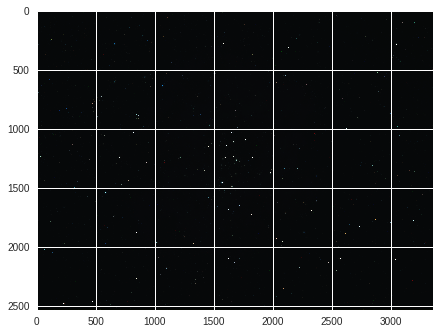

In [7]:
# display image
plt.imshow(RGB, interpolation = 'None', aspect='equal')
plt.show()

각 channel별 16bit 정수형으로 다시 변환하여 RGB 48bit 자료를 만들어 저장하자.

In [8]:
# convert 16bit each channel
RGB = np.asarray(RGB*65536.0, dtype=np.uint16)
print('RGB :', RGB)

# write 48 bit RGB png file
cv2.imwrite('RGB-48bit.png', RGB)

# write 48bit RGB fits file
hdu_R[0].data = RGB
hdu_R.writeto('RGB-bit.fit', overwrite =True)

RGB : [[[ 574 2117 2362]
  [1413 2198 2343]
  [1558 2222 2367]
  ...
  [1481 2162    0]
  [1445 2181    0]
  [1489  756    0]]

 [[ 615 2138 2364]
  [1614 2197 2364]
  [1799 2218 2371]
  ...
  [1723 2160    0]
  [1722 2147    0]
  [1738  749    0]]

 [[ 611 2126 2381]
  [1608 2220 2368]
  [1772 2212 2378]
  ...
  [1770 2187    0]
  [1753 2175    0]
  [1763  750    0]]

 ...

 [[ 620 1900    0]
  [1597 1935    0]
  [1749 1925    0]
  ...
  [1782 1939    0]
  [1780 1929    0]
  [1785  743    0]]

 [[ 599  680    0]
  [1602  704    0]
  [1754  710    0]
  ...
  [1794  690    0]
  [1778  704    0]
  [1747  374    0]]

 [[ 647    0    0]
  [1673    0    0]
  [1785    0    0]
  ...
  [1784    0    0]
  [1779    0    0]
  [1778    0    0]]]


정리 차원에서 최종 코드를 첨부한다.

* [full code](https://github.com/guitar79/OA-2018/blob/master/08-6.48_bit_RGB_composite_from_mono_16bit.py)